In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from dice_proba import Dice, prob_win

In [2]:
prob_map = [
    [
        prob_win(Dice(6, 1, i), Dice(6, 1, j)) for i in range(10)
    ] for j in range(10)
]

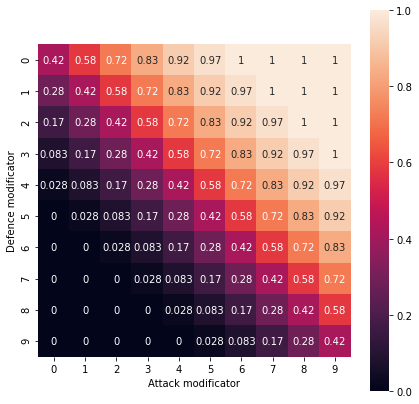

In [3]:
plt.figure(figsize=(7, 7))
sns.heatmap(prob_map, annot=True, square=True)
plt.xlabel("Attack modificator")
plt.ylabel("Defence modificator");